<a href="https://colab.research.google.com/github/soumikdalei/Machine-Learning-and-Deep-Learning-projects/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("djaidwalid/breast-cancer-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.35G/2.35G [00:19<00:00, 129MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/djaidwalid/breast-cancer-dataset/versions/1


In [2]:
train_dir=path+"/Breast Cancer/train"
test_dir=path+"/Breast Cancer/test"

In [3]:
train_dir

'/root/.cache/kagglehub/datasets/djaidwalid/breast-cancer-dataset/versions/1/Breast Cancer/train'

In [4]:
import os


for dirpath, dirnames, filenames in os.walk(path):
    print(f"Directory: {dirpath}")
    if dirnames:
        print(f"  Subdirectories: {dirnames}")
    if filenames:
        print(f"  Files: {filenames}")

Directory: /root/.cache/kagglehub/datasets/djaidwalid/breast-cancer-dataset/versions/1
  Subdirectories: ['Breast Cancer']
Directory: /root/.cache/kagglehub/datasets/djaidwalid/breast-cancer-dataset/versions/1/Breast Cancer
  Subdirectories: ['test', 'train']
Directory: /root/.cache/kagglehub/datasets/djaidwalid/breast-cancer-dataset/versions/1/Breast Cancer/test
  Subdirectories: ['breast_malignant', 'breast_benign']
Directory: /root/.cache/kagglehub/datasets/djaidwalid/breast-cancer-dataset/versions/1/Breast Cancer/test/breast_malignant
  Files: ['breast_malignant_1966.jpg', 'breast_malignant_1947.jpg', 'breast_malignant_3040.jpg', 'breast_malignant_1607.jpg', 'breast_malignant_0813.jpg', 'breast_malignant_2660.jpg', 'breast_malignant_4360.jpg', 'breast_malignant_4770.jpg', 'breast_malignant_3576.jpg', 'breast_malignant_3989.jpg', 'breast_malignant_0567.jpg', 'breast_malignant_4653.jpg', 'breast_malignant_1486.jpg', 'breast_malignant_3859.jpg', 'breast_malignant_3019.jpg', 'breast_ma

In [5]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data= tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")

Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [6]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2025-12-11 11:33:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2025-12-11 11:33:28 (16.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [7]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

**CNN**

In [8]:
tf.random.set_seed(42)
model_0=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(2,activation="sigmoid",name="output_layer")
])
model_0.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history_0=model_0.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=int(0.25*len(test_data)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 36s 131ms/step - accuracy: 0.4914 - loss: 101.2354 - val_accuracy: 0.5250 - val_loss: 0.6931
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 165ms/step - accuracy: 0.4965 - loss: 0.6932 - val_accuracy: 0.4958 - val_loss: 0.6932
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 33s 131ms/step - accuracy: 0.4914 - loss: 0.6932 - val_accuracy: 0.5063 - val_loss: 0.6931
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 140ms/step - accuracy: 0.4927 - loss: 0.6932 - val_accuracy: 0.4812 - val_loss: 0.6932
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 131ms/step - accuracy: 0.4920 - loss: 0.6932 - val_accuracy: 0.5125 - val_loss: 0.6931


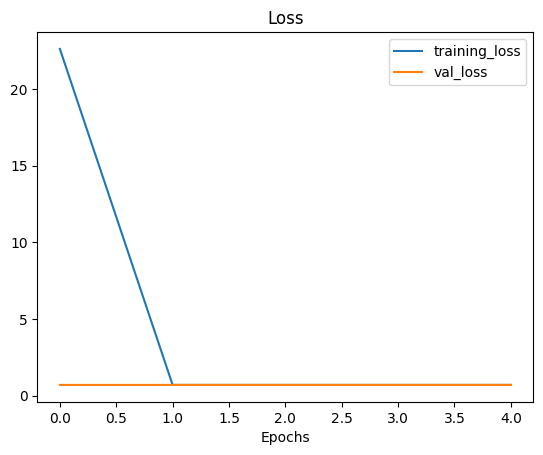

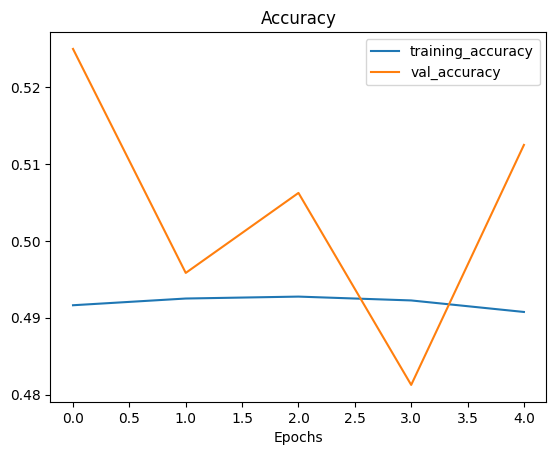

In [9]:
plot_loss_curves(history_0)

**Transfer Learning**

In [10]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
input=tf.keras.layers.Input(shape=(224,224,3),name='input_layer')
x=base_model(input)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
outputs=tf.keras.layers.Dense(2,activation="sigmoid",name="output_layer")(x)
model_1=tf.keras.Model(input,outputs)
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history_1=model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                      validation_data=test_data,validation_steps=int(0.25*len(test_data)))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 67s 162ms/step - accuracy: 0.9173 - loss: 0.2783 - val_accuracy: 0.9583 - val_loss: 0.1002
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 141ms/step - accuracy: 0.9756 - loss: 0.0837 - val_accuracy: 0.9667 - val_loss: 0.0784
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 161ms/step - accuracy: 0.9784 - loss: 0.0658 - val_accuracy: 0.9604 - val_loss: 0.0816
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 141ms/step - accuracy: 0.9814 - loss: 0.0563 - val_accuracy: 0.9750 - val_loss: 0.0628
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - accuracy: 0.9843 - loss: 0.0507 - val_accuracy: 0.9771 - val_loss: 0.0550


In [11]:
model_1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,057,259 (15.48 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 5,126 (20.03 KB)

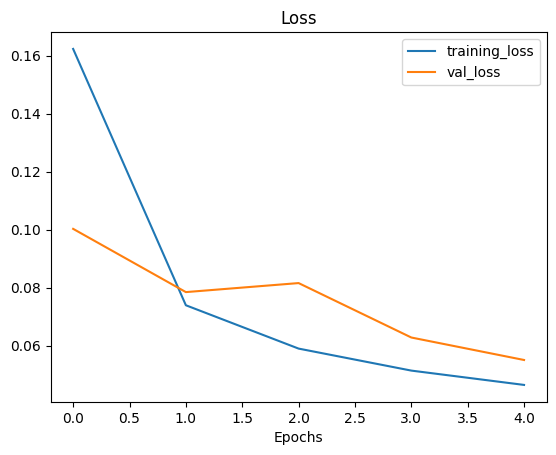

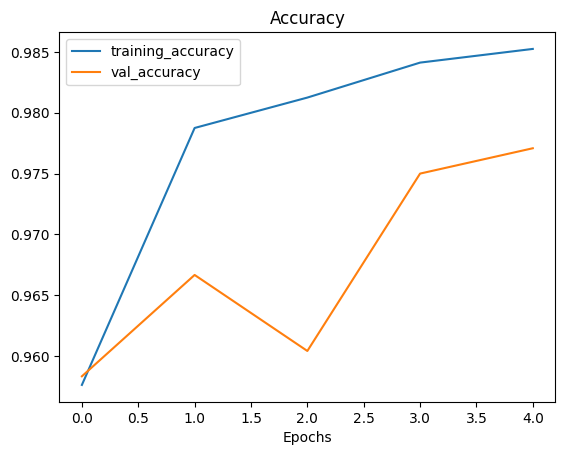

In [12]:
plot_loss_curves(history_1)

In [13]:
model_1.evaluate(test_data)

63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 298ms/step - accuracy: 0.9819 - loss: 0.0492


[0.05109976604580879, 0.9800000190734863]

In [14]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
])

**Data augmentation**

In [15]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
input=tf.keras.layers.Input(shape=(224,224,3),name='input_layer')
x=data_augmentation(input)
x=base_model(x,training=False)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
outputs=tf.keras.layers.Dense(2,activation="sigmoid",name="output_layer")(x)
model_2=tf.keras.Model(input,outputs)
model_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history_2=model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                      validation_data=test_data,validation_steps=int(0.25*len(test_data)))

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 59s 178ms/step - accuracy: 0.8657 - loss: 0.3611 - val_accuracy: 0.9563 - val_loss: 0.1566
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 165ms/step - accuracy: 0.9356 - loss: 0.1811 - val_accuracy: 0.9625 - val_loss: 0.1157
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - accuracy: 0.9458 - loss: 0.1537 - val_accuracy: 0.9708 - val_loss: 0.1035
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 162ms/step - accuracy: 0.9524 - loss: 0.1351 - val_accuracy: 0.9750 - val_loss: 0.0809
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 166ms/step - accuracy: 0.9531 - loss: 0.1247 - val_accuracy: 0.9729 - val_loss: 0.0860


In [16]:
model_2.evaluate(test_data)

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.9743 - loss: 0.0783


[0.0765133872628212, 0.9739999771118164]

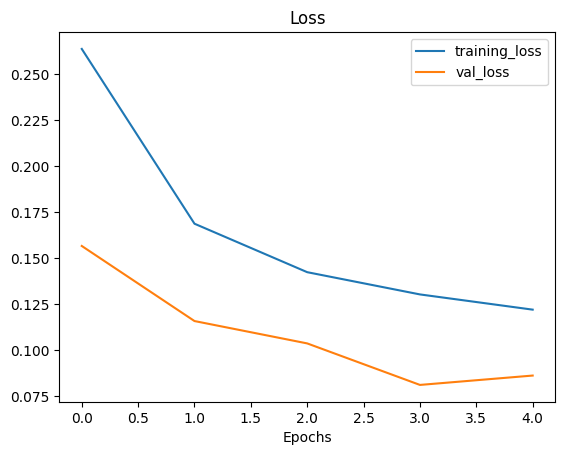

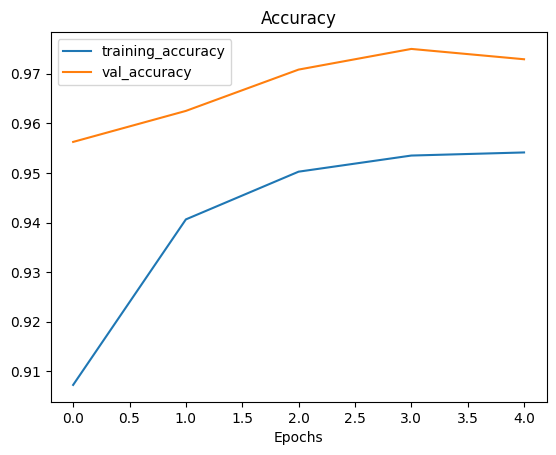

In [17]:
plot_loss_curves(history_2)

In [18]:
base_model.trainable=True
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [19]:
model_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [20]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer_2 False
1 rescaling_2 False
2 normalization_1 False
3 rescaling_3 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

**Fine Tuning**

In [21]:
fine_tune_epochs = 10
history_3=model_2.fit(train_data,epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)),
                                                     initial_epoch=history_2.epoch[-1])

Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 171ms/step - accuracy: 0.9442 - loss: 0.1583 - val_accuracy: 0.9896 - val_loss: 0.0223
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - accuracy: 0.9702 - loss: 0.0790 - val_accuracy: 0.9826 - val_loss: 0.0627
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 80s 157ms/step - accuracy: 0.9786 - loss: 0.0620 - val_accuracy: 0.9792 - val_loss: 0.0433
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 323ms/step - accuracy: 0.9756 - loss: 0.0581 - val_accuracy: 0.9583 - val_loss: 0.0973
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 158ms/step - accuracy: 0.9748 - loss: 0.0692 - val_accuracy: 0.9688 - val_loss: 0.0819
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 156ms/step - accuracy: 0.9836 - loss: 0.0447 - val_accuracy: 0.9826 - val_loss: 0.0460


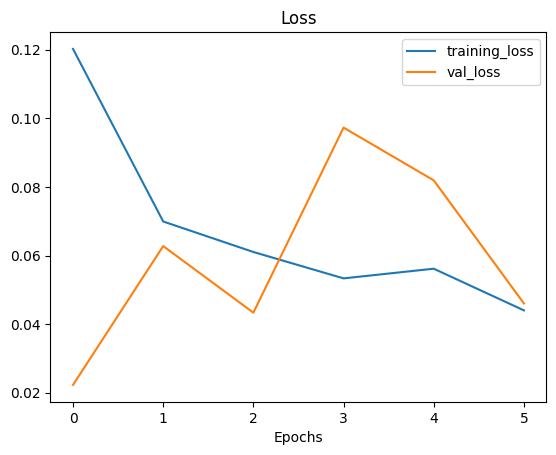

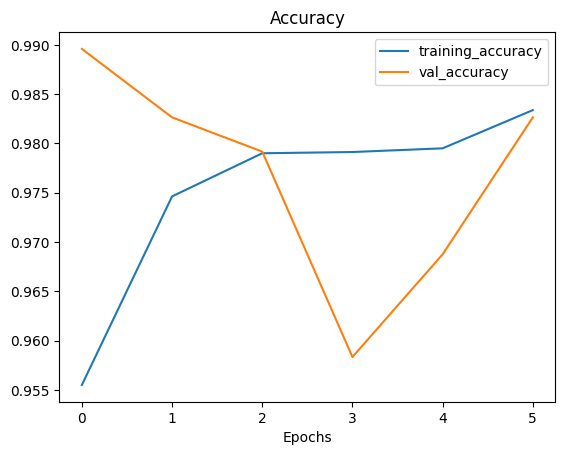

In [22]:
plot_loss_curves(history_3)

In [23]:
model_2.evaluate(test_data)

63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.9879 - loss: 0.0379


[0.04999291151762009, 0.9860000014305115]

In [24]:
from helper_functions import make_confusion_matrix, pred_and_plot

In [25]:
pred_probs=model_2.predict(test_data,verbose=1)
pred_probs[:10]

63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 181ms/step


array([[2.1565374e-05, 9.9998522e-01],
       [3.6762718e-02, 9.5320976e-01],
       [1.0000000e+00, 5.1471662e-16],
       [9.9997056e-01, 2.8900853e-05],
       [2.7739054e-03, 9.9740160e-01],
       [1.0000000e+00, 9.0495302e-23],
       [6.9991063e-04, 9.9931788e-01],
       [1.6050871e-01, 8.2974523e-01],
       [7.4261218e-01, 2.8889519e-01],
       [1.6996061e-07, 9.9999988e-01]], dtype=float32)

In [27]:
pred_classes= pred_probs.argmax(axis=1)
pred_classes

array([1, 1, 0, ..., 1, 0, 0])

In [28]:
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10]

[np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0)]

In [29]:
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.529

In [31]:
class_names = test_data.class_names
class_names

['breast_benign', 'breast_malignant']

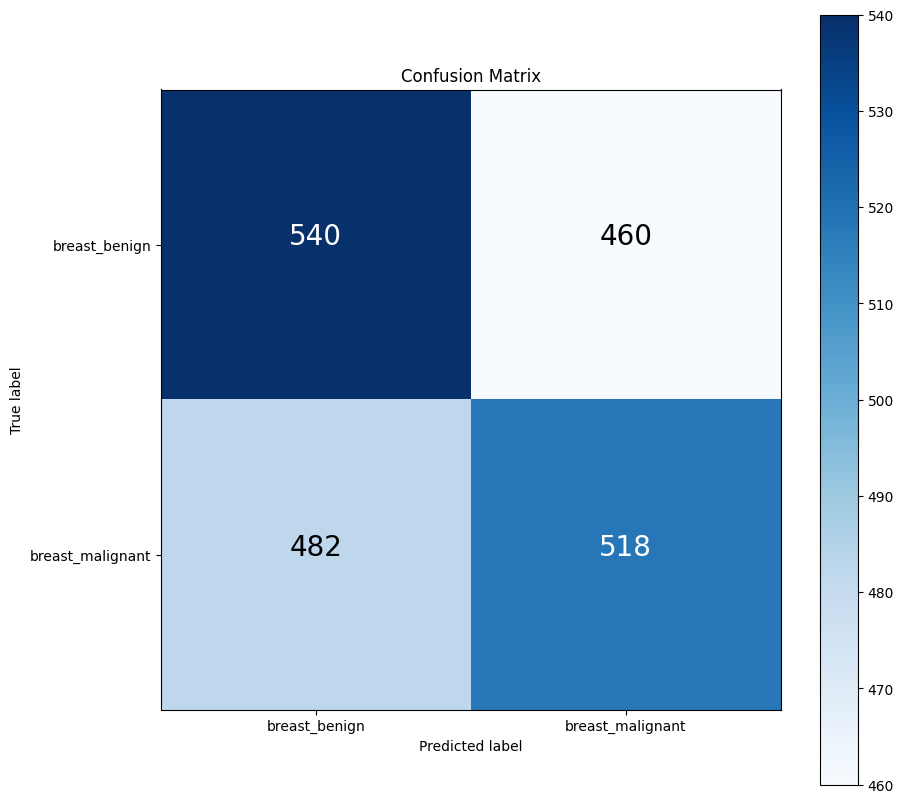

In [33]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(10, 10),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.53      0.54      0.53      1000
           1       0.53      0.52      0.52      1000

    accuracy                           0.53      2000
   macro avg       0.53      0.53      0.53      2000
weighted avg       0.53      0.53      0.53      2000



In [35]:
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 0.5283757338551859,
  'recall': 0.54,
  'f1-score': 0.5341246290801187,
  'support': 1000.0},
 '1': {'precision': 0.5296523517382413,
  'recall': 0.518,
  'f1-score': 0.5237613751263903,
  'support': 1000.0},
 'accuracy': 0.529,
 'macro avg': {'precision': 0.5290140427967136,
  'recall': 0.529,
  'f1-score': 0.5289430021032545,
  'support': 2000.0},
 'weighted avg': {'precision': 0.5290140427967136,
  'recall': 0.529,
  'f1-score': 0.5289430021032545,
  'support': 2000.0}}

In [36]:
class_f1_scores = {}

for k, v in classification_report_dict.items():
  if k == "accuracy":
    break
  else:

    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'breast_benign': 0.5341246290801187, 'breast_malignant': 0.5237613751263903}

In [37]:
import pandas as pd
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores.head()

,class_name,f1-score
0,breast_benign,0.534125
1,breast_malignant,0.523761


In [39]:
import matplotlib.pyplot as plt

In [41]:

def load_and_prep_image(filename, img_shape=224, scale=True):

  img = tf.io.read_file(filename)

  img = tf.io.decode_image(img)

  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:

    return img/255.
  else:
    return img

**Predicting on random images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


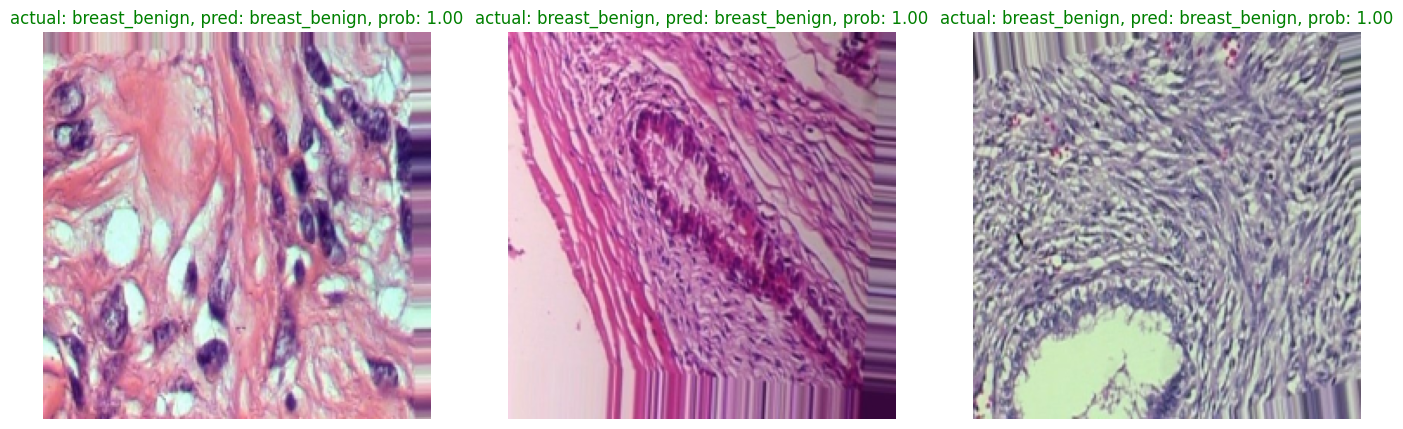

In [43]:
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):

  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + "/" + class_name + "/" + filename


  img = load_and_prep_image(filepath, scale=False)
  pred_prob = model_2.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_prob.argmax()]


  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class:
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

In [48]:
import os

custom_images_dir = "custom_pic_images"


if not os.path.exists(custom_images_dir):
    os.makedirs(custom_images_dir)
    print(f"Created directory: {custom_images_dir}. Please upload your custom images to this directory.")


custom_pic_images = [os.path.join(custom_images_dir, img_path) for img_path in os.listdir(custom_images_dir)]

if not custom_pic_images:
    print(f"Directory '{custom_images_dir}' is empty. Please upload images to it to proceed.")
else:
    print(f"Found {len(custom_pic_images)} custom images:")
    print(custom_pic_images)

Found 1 custom images:
['custom_pic_images/images.jpg']


**Predicting on own custom Image**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


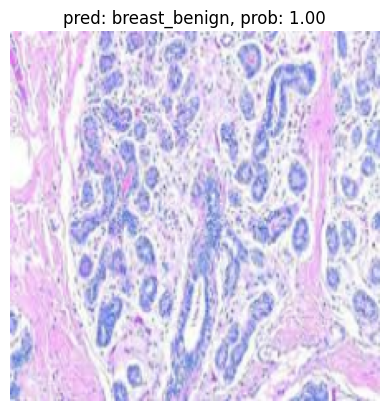

In [52]:
for img in custom_pic_images:
  img = load_and_prep_image(img, scale=False)
  pred_prob = model_2.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_prob.argmax()]

  plt.figure()
  plt.imshow(img/255.)
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
  plt.axis(False)